In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

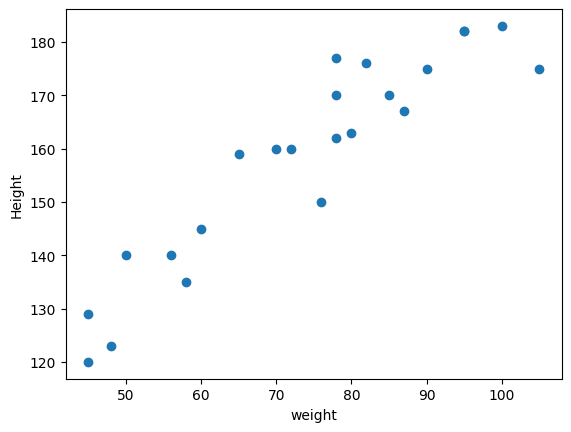

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("Height")

In [5]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


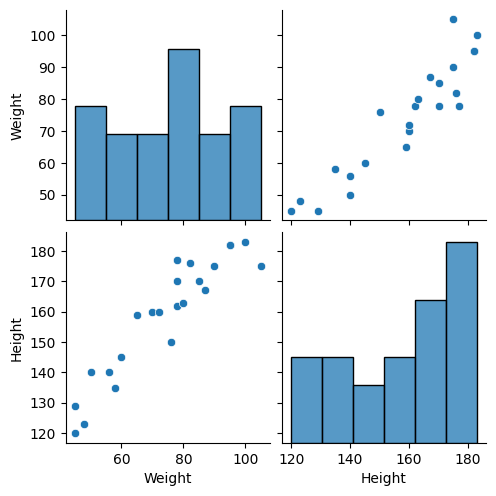

In [6]:
import seaborn as sns
sns.pairplot(df)

In [7]:
x=df[['Weight']]
y=df[['Height']]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(x_train)
#we use fit_transform for train thing so no for test we will use just transform nhi to x_test ka bhi mean wagera nikala tha 
#it is used to prevent data leakage


In [16]:
X_test=scaler.transform(x_test)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regression = LinearRegression(n_jobs=-1)

In [19]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [20]:
print("Coefficeint or slope : ",regression.coef_)
print("Intercept : ",regression.intercept_)

Coefficeint or slope :  [[17.2982057]]
Intercept :  [156.47058824]


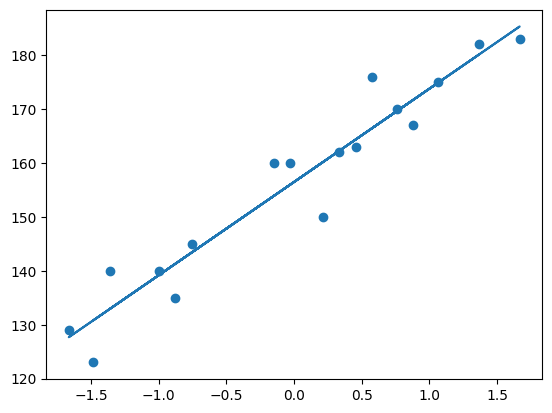

In [21]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [22]:
y_pred = regression.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [24]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [25]:
from sklearn.metrics import r2_score

In [26]:
score = r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [27]:
import statsmodels.api as sm

In [31]:
model = sm.OLS(y_train,X_train).fit()

In [33]:
prediction = model.predict(x_test)
print(prediction)

15    1349.260045
9     1349.260045
0      778.419257
8     1643.329542
17    1124.383371
12    1816.311599
dtype: float64


In [34]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 01 Jul 2025   Prob (F-statistic):                       0.664
Time:                        01:28:28   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\yashs\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [35]:
regression.predict(scaler.transform([[72]]))

c:\Users\yashs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[155.97744705]])